In [392]:
from dagsim.baseDS import Graph, Generic
import numpy as np

from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

In [393]:
def sig_fun(x, conf):
    z = np.exp(-(x + conf -1 + np.random.normal(scale=0.1)))
    sig = 1 / (1 + z)
    out = 1 if sig>0.5 else 0
    return out

def get_x(conf):
    if conf:
        return np.random.binomial(n=1, p=0.3)
    else:
        return np.random.binomial(n=1, p=0.6)

In [394]:
def run_all():
    conf = Generic(name="conf", function=np.random.binomial, arguments={"n": 1, "p": 0.2})
    X = Generic(name="X", function=get_x, arguments={"conf": conf})
    Y = Generic(name="Y", arguments={"x": X, "conf": conf}, function=sig_fun)

    listNodes = [X, conf, Y]
    my_graph = Graph("Graph1", listNodes)
    train = my_graph.simulate(num_samples=1000)
    test = my_graph.simulate(num_samples=150)

    conf = Generic(name="conf", function=np.random.binomial, arguments={"n": 1, "p": 0.8})
    X = Generic(name="X", function=get_x, arguments={"conf": conf})
    Y = Generic(name="Y", arguments={"x": X, "conf": conf}, function=sig_fun)
    
    listNodes = [X, conf, Y]
    my_graph = Graph("Graph1", listNodes)
    ext = my_graph.simulate(num_samples=150)

    return train, test, ext

In [395]:
def evaluate(train, test, ext):
    clf = LogisticRegression(random_state=0)

    X_tr = pd.DataFrame.from_dict(train).to_numpy()[:, 0:2]
    Y_tr = pd.DataFrame.from_dict(train).to_numpy()[:, 2]

    X_te = pd.DataFrame.from_dict(test).to_numpy()[:, 0:2]
    Y_te = pd.DataFrame.from_dict(test).to_numpy()[:, 2]

    X_ex = pd.DataFrame.from_dict(ext).to_numpy()[:, 0:2]
    Y_ex = pd.DataFrame.from_dict(ext).to_numpy()[:, 2]

    print("tr", sum(Y_tr))
    print("te", sum(Y_te))
    print("ex", sum(Y_ex))
    
    clf.fit(X_tr, Y_tr)

    tr_score = clf.score(X_tr, Y_tr)
    te_score = clf.score(X_te, Y_te)
    ex_score = clf.score(X_ex, Y_ex)

    return tr_score, te_score, ex_score

In [396]:
tr = []
te = []
ex = []

for i in range(500):
    train, test, ext = run_all()
    tr_score, te_score, ex_score = evaluate(train, test, ext)
    tr.append(tr_score)
    te.append(te_score)
    ex.append(ex_score)

tr, te, ex = np.array(tr), np.array(te), np.array(ex)

tr 365
te 56
ex 86
tr 376
te 55
ex 89
tr 377
te 48
ex 86
tr 371
te 65
ex 91
tr 386
te 57
ex 80
tr 389
te 48
ex 88
tr 379
te 55
ex 87
tr 363
te 53
ex 84
tr 359
te 55
ex 81
tr 385
te 66
ex 91
tr 367
te 55
ex 75
tr 374
te 53
ex 95
tr 369
te 51
ex 87
tr 371
te 63
ex 89
tr 364
te 63
ex 83
tr 375
te 51
ex 94
tr 382
te 42
ex 70
tr 376
te 50
ex 78
tr 390
te 65
ex 92
tr 369
te 56
ex 100
tr 404
te 51
ex 91
tr 372
te 48
ex 88
tr 355
te 63
ex 80
tr 360
te 61
ex 86
tr 358
te 54
ex 94
tr 380
te 55
ex 85
tr 365
te 61
ex 94
tr 367
te 48
ex 93
tr 382
te 59
ex 94
tr 341
te 50
ex 96
tr 380
te 51
ex 100
tr 363
te 55
ex 84
tr 350
te 64
ex 98
tr 358
te 55
ex 70
tr 354
te 55
ex 86
tr 361
te 53
ex 98
tr 350
te 52
ex 97
tr 339
te 47
ex 93
tr 361
te 57
ex 80
tr 367
te 56
ex 88
tr 380
te 48
ex 82
tr 382
te 56
ex 85
tr 407
te 54
ex 103
tr 377
te 51
ex 89
tr 360
te 54
ex 82
tr 379
te 63
ex 79
tr 367
te 65
ex 89
tr 404
te 49
ex 88
tr 384
te 54
ex 93
tr 361
te 58
ex 87
tr 369
te 60
ex 82
tr 362
te 58
ex 83
tr 350
te

tr 390
te 48
ex 87
tr 388
te 54
ex 90
tr 369
te 57
ex 95
tr 388
te 60
ex 86
tr 349
te 58
ex 99
tr 375
te 51
ex 94
tr 391
te 43
ex 83
tr 395
te 57
ex 82
tr 379
te 45
ex 102
tr 356
te 48
ex 76
tr 379
te 51
ex 100
tr 327
te 54
ex 82
tr 391
te 51
ex 88
tr 356
te 56
ex 88
tr 370
te 55
ex 86
tr 376
te 56
ex 85
tr 372
te 50
ex 74
tr 385
te 63
ex 83
tr 351
te 49
ex 85
tr 400
te 52
ex 77
tr 354
te 61
ex 81
tr 359
te 56
ex 95
tr 359
te 58
ex 83
tr 377
te 56
ex 83
tr 374
te 52
ex 93
tr 382
te 59
ex 82
tr 380
te 64
ex 88
tr 374
te 57
ex 93
tr 347
te 57
ex 91
tr 372
te 59
ex 91
tr 353
te 66
ex 89
tr 347
te 50
ex 86
tr 356
te 68
ex 81
tr 361
te 59
ex 95
tr 368
te 46
ex 79
tr 381
te 59
ex 86
tr 372
te 59
ex 84
tr 398
te 60
ex 94
tr 368
te 60
ex 82
tr 370
te 55
ex 89
tr 372
te 46
ex 87
tr 380
te 61
ex 73
tr 365
te 50
ex 97
tr 373
te 61
ex 87
tr 369
te 61
ex 89
tr 362
te 53
ex 91
tr 370
te 53
ex 79
tr 380
te 51
ex 87
tr 398
te 53
ex 88
tr 360
te 48
ex 92
tr 356
te 62
ex 93
tr 373
te 60
ex 86
tr 359
te 

<BarContainer object of 3 artists>

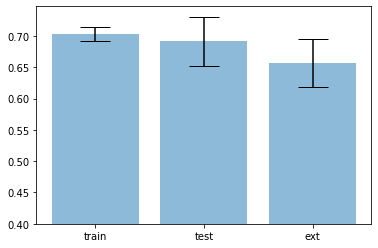

In [397]:
offset = 0.4
mean = [a-offset for a in [np.mean(tr), np.mean(te), np.mean(ex)]]
std_dev = [np.std(tr), np.std(te), np.std(ex)]

plt.bar(["train", "test", "ext"], mean, yerr=std_dev, align='center',
       alpha=0.5,
       ecolor='black',
       capsize=15, bottom=offset)